## Does education influence crime?

Beginning in 2005, the DOE began using the New York State method of calculating graduation rates. The first graduation cohort affected was the Cohort of 2001, which graduated in 2005.
The cohort consists of all students who first entered grade 9 in a given school year. First year of high school.
Graduates are defined as those students earning either a Local or Regents diploma.

in order to understand the level of education for a certain borough in New York city, we look at:
- gradutation rates % : Graduates are defined as those students earning either a Local or Regents diploma




### First source: graduation rate per neighbourhood in NYC per school year


In [1]:
# import all the libraries we will use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read the CSV file and skip the first 6 rows
graduation_rates = pd.read_csv("data/Graduation Rate.csv",sep = ",", skiprows = 5)
graduation_rates.shape

In [ ]:
# have a glance on the data - min 2007 and max 2021
graduation_rates.describe()

In [ ]:
graduation_rates['Location'].unique()

In [ ]:
graduation_rates.head(20)

In [ ]:
graduation_rates[graduation_rates['Fips']=='SD22']

In [ ]:
graduation_rates_gender = pd.read_csv("data/Graduation Rate by Gender.csv",sep = ",", skiprows = 5)
graduation_rates_gender

In [ ]:
graduation_rates_ethnicity =  pd.read_csv("data/Graduation Rate by Race_Ethnicity.csv",sep = ",", skiprows = 5)
graduation_rates_ethnicity

In [ ]:
graduation_rates_ethnicity.info()

In [ ]:
graduation_rates_ethnicity_si = graduation_rates_ethnicity[graduation_rates_ethnicity['Location']== 'Staten Island']
graduation_rates_ethnicity_si

In [ ]:
graduation_rates_ethnicity_si.groupby('TimeFrame').agg({"Data":"mean"
                                                                         })

## NYC Public Schools data source

Overview of the data set:
- Borough: borough name from NYC
- Category: ethnicity, gender, poverty...
- Cohort year: year of graduation
- Cohort: year path type: either graduated in August or June and 4/5 or 6 year path graduate
- Regents: are statewide standardized examinations in core high school subjects. Students are required to pass these exams to earn a Regents Diploma
- advanced regents diploma: lets students show additional skills in math, science and languages other than english
- local: students that meet specific criteria with lower exam scores

- % grad + % still enrolled + % dropout + % SACC(IEP diploma) + %TASC(GED) = 100%

In [13]:
sheet_names = pd.read_excel('data/graduation_rates_borough.xlsx', sheet_name=None)
#sheet_names.keys()
del sheet_names["Ever ELL"]

In [14]:
sheet_names.keys()

dict_keys(['All', 'ELL', 'SWD', 'Ethnicity', 'Gender', 'Poverty', 'NOTES'])

In [15]:
# Read excel file and create dict object, containing all sheets
# Create a data frame for every sheet
for name in sheet_names:
    # For every sheet in the workbook, create a new data frame
    exec(f"graduates_{name} = pd.DataFrame(sheet_names[name])")
    # Show the name of the sheet and its data frame created
    print(f"Created 'graduates_{name}' from '{name}' sheet.")


Created 'graduates_All' from 'All' sheet.
Created 'graduates_ELL' from 'ELL' sheet.
Created 'graduates_SWD' from 'SWD' sheet.
Created 'graduates_Ethnicity' from 'Ethnicity' sheet.
Created 'graduates_Gender' from 'Gender' sheet.
Created 'graduates_Poverty' from 'Poverty' sheet.
Created 'graduates_NOTES' from 'NOTES' sheet.


In [18]:
sheet_names_2 = pd.read_excel('data/graduation_rates_borough_2.xlsx', sheet_name=None)
del sheet_names_2["Ever ELL"]



In [19]:
sheet_names_2.keys()

dict_keys(['NOTES', 'All', 'ELL', 'SWD', 'Ethnicity', 'Gender', 'Poverty'])

In [20]:
# Read excel file and create dict object, containing all sheets
# Create a data frame for every sheet

for name in sheet_names_2:
    # For every sheet in the workbook, create a new data frame
    exec(f"graduates_2_{name} = pd.DataFrame(sheet_names_2[name])")
    # Show the name of the sheet and its data frame created
    print(f"Created 'graduates_2_{name}' from '{name}' sheet.")


Created 'graduates_2_NOTES' from 'NOTES' sheet.
Created 'graduates_2_All' from 'All' sheet.
Created 'graduates_2_ELL' from 'ELL' sheet.
Created 'graduates_2_SWD' from 'SWD' sheet.
Created 'graduates_2_Ethnicity' from 'Ethnicity' sheet.
Created 'graduates_2_Gender' from 'Gender' sheet.
Created 'graduates_2_Poverty' from 'Poverty' sheet.


In [21]:
graduates_All.columns

Index(['Borough', 'Category', 'Cohort Year', 'Cohort', '# Total Cohort',
       '# Grads', '% Grads', '# Total Regents', '% Total Regents of Cohort',
       '% Total Regents of Grads', '# Advanced Regents',
       '% Advanced Regents of Cohort', '% Advanced Regents of Grads',
       '# Regents without Advanced', '% Regents without Advanced of Cohort',
       '% Regents without Advanced of Grads', '# Local', '% Local of Cohort',
       '% Local of Grads', '# Still Enrolled', '% Still Enrolled', '# Dropout',
       '% Dropout', '# SACC (IEP Diploma)', '% SACC (IEP Diploma) of Cohort',
       '# TASC (GED)', '% TASC (GED) of Cohort'],
      dtype='object')

In [24]:
full_graduates = pd.concat([graduates_Ethnicity,graduates_Gender,graduates_Poverty,graduates_2_Ethnicity,graduates_2_Gender, graduates_2_Poverty ], ignore_index=True)

## create a csv to get the data 
full_graduates .to_csv('full_graduation_rates_rows.csv', index=False)

In [25]:
full_graduates

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Bronx,Asian,2015,4 year August,999,923,92.392395,894,89.489487,96.85807,...,2.902903,3.141928,48,4.804805,25,2.502502,1,0.1001,2,0.2002
1,Bronx,Asian,2014,4 year August,968,866,89.462807,839,86.673553,96.882217,...,2.789256,3.117783,71,7.334711,29,2.995868,1,0.103306,1,0.103306
2,Bronx,Asian,2013,4 year August,883,801,90.713478,784,88.788223,97.877655,...,1.925255,2.122347,56,6.342016,23,2.604757,2,0.226501,1,0.11325
3,Bronx,Asian,2012,4 year August,981,876,89.296638,855,87.15596,97.602737,...,2.140673,2.39726,70,7.135576,31,3.160041,2,0.203874,2,0.203874
4,Bronx,Asian,2011,4 year August,957,841,87.878784,827,86.415886,98.335312,...,1.462905,1.664685,81,8.46395,30,3.134796,4,0.417973,1,0.104493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.44725,1847,93.235741,98.717262,...,1.211509,1.282737,19,0.959112,71,3.584049,3,0.151439,17,0.858152
5053,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.299469,1559,83.36898,90.324448,...,8.930481,9.67555,41,2.192513,77,4.117647,3,0.160428,23,1.229946
5054,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.812065,1646,81.404549,90.638763,...,8.407517,9.361234,52,2.571711,125,6.181998,6,0.296736,23,1.137488
5055,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.774597,1810,80.94812,91.183876,...,7.826476,8.816121,56,2.504472,150,6.708408,11,0.49195,34,1.520572


In [26]:
full_graduates['Borough'].value_counts()

Borough
Bronx            984
Brooklyn         984
Manhattan        979
Queens           979
Staten Island    973
District 79      158
Name: count, dtype: int64

## Data cleansing

In [ ]:
def clean_orders(orders):
    ''' 
    This function will
    '''

    # change column names to lower
    orders.columns = orders.columns.str.lower()    

    # change column case and spaces to "_"                   
    orders.columns = orders.columns.str.replace(" ","_")

    # drop NAs                   
    orders.dropna(subset=["postal_code"], inplace=True)

    # drop the "index" column as it doe snot add any value
    orders.drop("index", axis= 1,  inplace=True)

    # drop duplicates
    orders.drop_duplicates(inplace=True)

    # change order_date to date format
    orders["order_date"] = pd.to_datetime(orders['order_date'], format='%d/%m/%Y')
    orders ["order_date"]

    # change postcode to str
    orders["postal_code"] = pd.Series(orders["postal_code"], dtype="str")
    orders["postal_code"]= orders["postal_code"].str.replace(".0","")


# Returned the modified DataFrame
    return orders

In [27]:
#create a function to adjust the column names
full_graduates.columns = full_graduates.columns.str.lower()

# change column case and spaces to "_"                   
full_graduates.columns = full_graduates.columns.str.replace(" ","_")
full_graduates.columns

Index(['borough', 'category', 'cohort_year', 'cohort', '#_total_cohort',
       '#_grads', '%_grads', '#_total_regents', '%_total_regents_of_cohort',
       '%_total_regents_of_grads', '#_advanced_regents',
       '%_advanced_regents_of_cohort', '%_advanced_regents_of_grads',
       '#_regents_without_advanced', '%_regents_without_advanced_of_cohort',
       '%_regents_without_advanced_of_grads', '#_local', '%_local_of_cohort',
       '%_local_of_grads', '#_still_enrolled', '%_still_enrolled', '#_dropout',
       '%_dropout', '#_sacc_(iep_diploma)', '%_sacc_(iep_diploma)_of_cohort',
       '#_tasc_(ged)', '%_tasc_(ged)_of_cohort'],
      dtype='object')

In [28]:
# check for null or any missing data
# we can see certain columns have missing values
full_graduates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5057 entries, 0 to 5056
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   borough                               5057 non-null   object
 1   category                              5057 non-null   object
 2   cohort_year                           5057 non-null   int64 
 3   cohort                                5057 non-null   object
 4   #_total_cohort                        5057 non-null   int64 
 5   #_grads                               5057 non-null   object
 6   %_grads                               5057 non-null   object
 7   #_total_regents                       5057 non-null   object
 8   %_total_regents_of_cohort             5057 non-null   object
 9   %_total_regents_of_grads              5050 non-null   object
 10  #_advanced_regents                    5057 non-null   object
 11  %_advanced_regents_of_cohort  

In [29]:
# certain columns are missing some values
full_graduates.isnull().sum()

borough                                 0
category                                0
cohort_year                             0
cohort                                  0
#_total_cohort                          0
#_grads                                 0
%_grads                                 0
#_total_regents                         0
%_total_regents_of_cohort               0
%_total_regents_of_grads                7
#_advanced_regents                      0
%_advanced_regents_of_cohort            0
%_advanced_regents_of_grads             7
#_regents_without_advanced              0
%_regents_without_advanced_of_cohort    0
%_regents_without_advanced_of_grads     7
#_local                                 0
%_local_of_cohort                       0
%_local_of_grads                        7
#_still_enrolled                        0
%_still_enrolled                        0
#_dropout                               0
%_dropout                               0
#_sacc_(iep_diploma)              

In [30]:
full_graduates[full_graduates['%_total_regents_of_grads'].isnull()]

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,#_sacc_(iep_diploma),%_sacc_(iep_diploma)_of_cohort,#_tasc_(ged),%_tasc_(ged)_of_cohort
761,District 79,Black,2006,4 year August,6,0,0,0,0,NaN,...,0,NaN,2,33.333332,4,66.666664,0,0,0,0
763,District 79,Black,2006,4 year June,6,0,0,0,0,NaN,...,0,NaN,2,33.333332,4,66.666664,0,0,0,0
779,District 79,Hispanic,2005,4 year August,20,0,0,0,0,NaN,...,0,NaN,4,20,15,75,0,0,1,5
781,District 79,Hispanic,2005,4 year June,20,0,0,0,0,NaN,...,0,NaN,4,20,15,75,0,0,1,5
786,District 79,Hispanic,2005,5 year June,22,0,0,0,0,NaN,...,0,NaN,5,22.727272,17,77.272728,0,0,0,0
809,District 79,Native American,2001,4 year June,27,0,0,0,0,NaN,...,0,NaN,10,37.037037,17,62.962963,0,0,0,0
1413,Queens,Multi-Racial,2002,4 year June,7,0,0,0,0,NaN,...,0,NaN,7,100,0,0,0,0,0,0


In [31]:
# since the NaNs correspond to a cohort that did not graduate, I will just change it to 0
full_graduates.fillna(0, inplace=True)

In [32]:
# check if there are no missing values
full_graduates.isnull().sum()

borough                                 0
category                                0
cohort_year                             0
cohort                                  0
#_total_cohort                          0
#_grads                                 0
%_grads                                 0
#_total_regents                         0
%_total_regents_of_cohort               0
%_total_regents_of_grads                0
#_advanced_regents                      0
%_advanced_regents_of_cohort            0
%_advanced_regents_of_grads             0
#_regents_without_advanced              0
%_regents_without_advanced_of_cohort    0
%_regents_without_advanced_of_grads     0
#_local                                 0
%_local_of_cohort                       0
%_local_of_grads                        0
#_still_enrolled                        0
%_still_enrolled                        0
#_dropout                               0
%_dropout                               0
#_sacc_(iep_diploma)              

Cohort_year:  is the year when they joined the 9th grade
Cohort: cohort graduation 

To get the exact year of graduation I will get the years from the cohort column and sum them up to the cohort_year column


In [33]:
#first create a new column with the n_year from the cohort column// cohort column is a string

full_graduates['year_path'] = full_graduates['cohort'].str[0]

# lets create a new column with the graduation_year
# change year_path to int64

full_graduates['year_path'] = full_graduates['year_path'].astype(int)

full_graduates['graduation_year'] = full_graduates['cohort_year'] + full_graduates['year_path']
full_graduates


,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,#_sacc_(iep_diploma),%_sacc_(iep_diploma)_of_cohort,#_tasc_(ged),%_tasc_(ged)_of_cohort,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923,92.392395,894,89.489487,96.85807,...,48,4.804805,25,2.502502,1,0.1001,2,0.2002,4,2019
1,Bronx,Asian,2014,4 year August,968,866,89.462807,839,86.673553,96.882217,...,71,7.334711,29,2.995868,1,0.103306,1,0.103306,4,2018
2,Bronx,Asian,2013,4 year August,883,801,90.713478,784,88.788223,97.877655,...,56,6.342016,23,2.604757,2,0.226501,1,0.11325,4,2017
3,Bronx,Asian,2012,4 year August,981,876,89.296638,855,87.15596,97.602737,...,70,7.135576,31,3.160041,2,0.203874,2,0.203874,4,2016
4,Bronx,Asian,2011,4 year August,957,841,87.878784,827,86.415886,98.335312,...,81,8.46395,30,3.134796,4,0.417973,1,0.104493,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.44725,1847,93.235741,98.717262,...,19,0.959112,71,3.584049,3,0.151439,17,0.858152,6,2022
5053,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.299469,1559,83.36898,90.324448,...,41,2.192513,77,4.117647,3,0.160428,23,1.229946,6,2021
5054,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.812065,1646,81.404549,90.638763,...,52,2.571711,125,6.181998,6,0.296736,23,1.137488,6,2020
5055,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.774597,1810,80.94812,91.183876,...,56,2.504472,150,6.708408,11,0.49195,34,1.520572,6,2019


In [34]:
full_graduates

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,#_sacc_(iep_diploma),%_sacc_(iep_diploma)_of_cohort,#_tasc_(ged),%_tasc_(ged)_of_cohort,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923,92.392395,894,89.489487,96.85807,...,48,4.804805,25,2.502502,1,0.1001,2,0.2002,4,2019
1,Bronx,Asian,2014,4 year August,968,866,89.462807,839,86.673553,96.882217,...,71,7.334711,29,2.995868,1,0.103306,1,0.103306,4,2018
2,Bronx,Asian,2013,4 year August,883,801,90.713478,784,88.788223,97.877655,...,56,6.342016,23,2.604757,2,0.226501,1,0.11325,4,2017
3,Bronx,Asian,2012,4 year August,981,876,89.296638,855,87.15596,97.602737,...,70,7.135576,31,3.160041,2,0.203874,2,0.203874,4,2016
4,Bronx,Asian,2011,4 year August,957,841,87.878784,827,86.415886,98.335312,...,81,8.46395,30,3.134796,4,0.417973,1,0.104493,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.44725,1847,93.235741,98.717262,...,19,0.959112,71,3.584049,3,0.151439,17,0.858152,6,2022
5053,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.299469,1559,83.36898,90.324448,...,41,2.192513,77,4.117647,3,0.160428,23,1.229946,6,2021
5054,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.812065,1646,81.404549,90.638763,...,52,2.571711,125,6.181998,6,0.296736,23,1.137488,6,2020
5055,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.774597,1810,80.94812,91.183876,...,56,2.504472,150,6.708408,11,0.49195,34,1.520572,6,2019


In [35]:
# lets drop the columns we might not want
full_graduates.drop(['#_sacc_(iep_diploma)','%_sacc_(iep_diploma)_of_cohort','#_tasc_(ged)', '%_tasc_(ged)_of_cohort'],axis='columns', inplace= True)

In [36]:
full_graduates

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_regents_without_advanced_of_grads,#_local,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923,92.392395,894,89.489487,96.85807,...,34.561214,29,2.902903,3.141928,48,4.804805,25,2.502502,4,2019
1,Bronx,Asian,2014,4 year August,968,866,89.462807,839,86.673553,96.882217,...,31.986143,27,2.789256,3.117783,71,7.334711,29,2.995868,4,2018
2,Bronx,Asian,2013,4 year August,883,801,90.713478,784,88.788223,97.877655,...,31.335831,17,1.925255,2.122347,56,6.342016,23,2.604757,4,2017
3,Bronx,Asian,2012,4 year August,981,876,89.296638,855,87.15596,97.602737,...,35.61644,21,2.140673,2.39726,70,7.135576,31,3.160041,4,2016
4,Bronx,Asian,2011,4 year August,957,841,87.878784,827,86.415886,98.335312,...,26.27824,14,1.462905,1.664685,81,8.46395,30,3.134796,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.44725,1847,93.235741,98.717262,...,38.482094,24,1.211509,1.282737,19,0.959112,71,3.584049,6,2022
5053,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.299469,1559,83.36898,90.324448,...,47.74044,167,8.930481,9.67555,41,2.192513,77,4.117647,6,2021
5054,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.812065,1646,81.404549,90.638763,...,49.72467,170,8.407517,9.361234,52,2.571711,125,6.181998,6,2020
5055,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.774597,1810,80.94812,91.183876,...,53.551636,175,7.826476,8.816121,56,2.504472,150,6.708408,6,2019


In [37]:
full_graduates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5057 entries, 0 to 5056
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   borough                               5057 non-null   object
 1   category                              5057 non-null   object
 2   cohort_year                           5057 non-null   int64 
 3   cohort                                5057 non-null   object
 4   #_total_cohort                        5057 non-null   int64 
 5   #_grads                               5057 non-null   object
 6   %_grads                               5057 non-null   object
 7   #_total_regents                       5057 non-null   object
 8   %_total_regents_of_cohort             5057 non-null   object
 9   %_total_regents_of_grads              5057 non-null   object
 10  #_advanced_regents                    5057 non-null   object
 11  %_advanced_regents_of_cohort  

In [38]:
# change from column 5 all objects into numbers

# define the columns to convert
columns_to_convert = columns_to_convert = full_graduates.columns[4:]

# Iterate through each column in the list of columns to convert
for col in columns_to_convert:
    # Use try-except to handle columns that cannot be converted to numeric
    try:
        # Convert the values in the column to numeric format
        full_graduates[col] = pd.to_numeric(full_graduates[col], errors='coerce')  # 'coerce' option replaces non-convertible values with NaN
    except:
        print(f"Could not convert column '{col}' to numeric")

# Now the values in the specified columns should be converted to numeric format where possible


In [39]:
# check if the change worked
full_graduates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5057 entries, 0 to 5056
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   borough                               5057 non-null   object 
 1   category                              5057 non-null   object 
 2   cohort_year                           5057 non-null   int64  
 3   cohort                                5057 non-null   object 
 4   #_total_cohort                        5057 non-null   int64  
 5   #_grads                               4941 non-null   float64
 6   %_grads                               4941 non-null   float64
 7   #_total_regents                       4941 non-null   float64
 8   %_total_regents_of_cohort             4941 non-null   float64
 9   %_total_regents_of_grads              4941 non-null   float64
 10  #_advanced_regents                    4941 non-null   float64
 11  %_advanced_regent

### Remember for each year you will get 2 values because of the June/August graduations

## Lets explore the data

In [40]:
full_graduates.head()

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_regents_without_advanced_of_grads,#_local,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923.0,92.392395,894.0,89.489487,96.858070,...,34.561214,29.0,2.902903,3.141928,48.0,4.804805,25.0,2.502502,4,2019
1,Bronx,Asian,2014,4 year August,968,866.0,89.462807,839.0,86.673553,96.882217,...,31.986143,27.0,2.789256,3.117783,71.0,7.334711,29.0,2.995868,4,2018
2,Bronx,Asian,2013,4 year August,883,801.0,90.713478,784.0,88.788223,97.877655,...,31.335831,17.0,1.925255,2.122347,56.0,6.342016,23.0,2.604757,4,2017
3,Bronx,Asian,2012,4 year August,981,876.0,89.296638,855.0,87.155960,97.602737,...,35.616440,21.0,2.140673,2.397260,70.0,7.135576,31.0,3.160041,4,2016
4,Bronx,Asian,2011,4 year August,957,841.0,87.878784,827.0,86.415886,98.335312,...,26.278240,14.0,1.462905,1.664685,81.0,8.463950,30.0,3.134796,4,2015


In [41]:
# lets check for how long is the data
print(full_graduates['graduation_year'].min())
print(full_graduates['graduation_year'].max())

2005
2023


In [42]:
# lets check fot the categorical columns
print(full_graduates['borough'].unique())
print(full_graduates['category'].unique())
print(full_graduates['graduation_year'].unique())

['Bronx' 'Brooklyn' 'District 79' 'Manhattan' 'Queens' 'Staten Island']
['Asian' 'Black' 'Hispanic' 'Multi-Racial' 'Native American' 'White'
 'Female' 'Male' 'Econ Disadv' 'Not Econ Disadv' 'Neither Female nor Male']
[2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006
 2005 2023 2022 2021 2020]


In [43]:
# define the different datframes filters

filter_ethniticy = ['Asian', 'Black', 'Hispanic', 'Multi-Racial', 'Native American','White']
filter_gender = ['Female', 'Male']
filter_econ_situation = ['Econ Disadv', 'Not Econ Disadv']


### Lets look at ethnicity

In [44]:
# first we will need to filter for the categories including th ethnicity filter
full_graduates_ethnicity = full_graduates[full_graduates.category.isin(filter_ethniticy)]
full_graduates_ethnicity

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_regents_without_advanced_of_grads,#_local,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,year_path,graduation_year
0,Bronx,Asian,2015,4 year August,999,923.0,92.392395,894.0,89.489487,96.858070,...,34.561214,29.0,2.902903,3.141928,48.0,4.804805,25.0,2.502502,4,2019
1,Bronx,Asian,2014,4 year August,968,866.0,89.462807,839.0,86.673553,96.882217,...,31.986143,27.0,2.789256,3.117783,71.0,7.334711,29.0,2.995868,4,2018
2,Bronx,Asian,2013,4 year August,883,801.0,90.713478,784.0,88.788223,97.877655,...,31.335831,17.0,1.925255,2.122347,56.0,6.342016,23.0,2.604757,4,2017
3,Bronx,Asian,2012,4 year August,981,876.0,89.296638,855.0,87.155960,97.602737,...,35.616440,21.0,2.140673,2.397260,70.0,7.135576,31.0,3.160041,4,2016
4,Bronx,Asian,2011,4 year August,957,841.0,87.878784,827.0,86.415886,98.335312,...,26.278240,14.0,1.462905,1.664685,81.0,8.463950,30.0,3.134796,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,Staten Island,White,2016,6 year June,2168,2041.0,94.142067,2009.0,92.666054,98.432144,...,41.303284,32.0,1.476015,1.567859,28.0,1.291513,69.0,3.182657,6,2022
4319,Staten Island,White,2015,6 year June,2120,1941.0,91.556602,1731.0,81.650940,89.180832,...,49.819679,210.0,9.905661,10.819165,48.0,2.264151,81.0,3.820755,6,2021
4320,Staten Island,White,2014,6 year June,2235,2033.0,90.961967,1797.0,80.402687,88.391541,...,50.565666,236.0,10.559284,11.608460,39.0,1.744966,108.0,4.832215,6,2020
4321,Staten Island,White,2013,6 year June,2290,2065.0,90.174675,1873.0,81.790390,90.702179,...,56.513317,192.0,8.384279,9.297821,51.0,2.227074,115.0,5.021834,6,2019


In [45]:
# here i leave an example of how i want my data to show
# Sample DataFrame
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Value': [10, 20, 30, 40, 50, 60]
}
df = pd.DataFrame(data)

# Group by 'Category' and 'Subcategory' columns and calculate the sum of 'Value' column within each group
result = df.groupby(['Category', 'Subcategory'])['Value'].sum()

print(result)


Category  Subcategory
A         X               60
          Y               20
B         X               30
          Y              100
Name: Value, dtype: int64


In [46]:
full_graduates_ethnicity.columns

Index(['borough', 'category', 'cohort_year', 'cohort', '#_total_cohort',
       '#_grads', '%_grads', '#_total_regents', '%_total_regents_of_cohort',
       '%_total_regents_of_grads', '#_advanced_regents',
       '%_advanced_regents_of_cohort', '%_advanced_regents_of_grads',
       '#_regents_without_advanced', '%_regents_without_advanced_of_cohort',
       '%_regents_without_advanced_of_grads', '#_local', '%_local_of_cohort',
       '%_local_of_grads', '#_still_enrolled', '%_still_enrolled', '#_dropout',
       '%_dropout', 'year_path', 'graduation_year'],
      dtype='object')

## Understand how the data is displayed

each cohort has 3 different year paths and each year path has 2 graduation events. June and August so have the total per graduation year I took the latest number incl. august graduates. 

In [47]:
full_graduates_ethnicity_grouped = full_graduates_ethnicity.groupby(['graduation_year','borough','category', 'year_path']).agg({
                                                                                                        '#_total_cohort':'first',
                                                                                                        '#_grads':'first',
                                                                                                        '#_still_enrolled':'first',
                                                                                                        '#_dropout':'first'}).reset_index()
full_graduates_ethnicity_grouped = full_graduates_ethnicity_grouped.groupby(['graduation_year','borough','category']).agg({
                                                                                                        '#_total_cohort':'sum',
                                                                                                        '#_grads':'sum',
                                                                                                        '#_still_enrolled':'sum',
                                                                                                        '#_dropout':'sum'
                                                                                                        }).reset_index()

full_graduates_ethnicity_grouped

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout
0,2005,Bronx,Asian,638,479.0,92.0,60.0
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0
2,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0
3,2005,Bronx,Multi-Racial,1,0.0,0.0,0.0
4,2005,Bronx,Native American,56,0.0,0.0,0.0
...,...,...,...,...,...,...,...
596,2023,Staten Island,Black,1835,1445.0,100.0,222.0
597,2023,Staten Island,Hispanic,3779,3069.0,212.0,354.0
598,2023,Staten Island,Multi-Racial,183,160.0,10.0,9.0
599,2023,Staten Island,Native American,72,62.0,3.0,4.0


In [48]:
# now lets check if the grouping is working and sense checking
full_graduates_ethnicity[(full_graduates_ethnicity['graduation_year']==2005) & (full_graduates_ethnicity['borough']=='Bronx')]

,borough,category,cohort_year,cohort,#_total_cohort,#_grads,%_grads,#_total_regents,%_total_regents_of_cohort,%_total_regents_of_grads,...,%_regents_without_advanced_of_grads,#_local,%_local_of_cohort,%_local_of_grads,#_still_enrolled,%_still_enrolled,#_dropout,%_dropout,year_path,graduation_year
25,Bronx,Asian,2001,4 year June,638,479.0,75.078369,396.0,62.068966,82.672234,...,17.118998,84.0,13.166144,17.536535,92.0,14.420063,60.0,9.404388,4,2005
87,Bronx,Black,2001,4 year June,3852,1662.0,43.146416,800.0,20.768433,48.134777,...,38.628159,862.0,22.377985,51.865223,1213.0,31.490135,770.0,19.989616,4,2005
149,Bronx,Hispanic,2001,4 year June,6150,2261.0,36.764229,1064.0,17.300814,47.058823,...,36.355595,1198.0,19.479675,52.985405,2035.0,33.089432,1506.0,24.487804,4,2005
211,Bronx,Multi-Racial,2001,4 year June,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2005
273,Bronx,Native American,2001,4 year June,56,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2005
335,Bronx,White,2001,4 year June,756,485.0,64.153442,368.0,48.677250,75.876289,...,18.144329,117.0,15.476191,24.123711,153.0,20.238094,95.0,12.566137,4,2005


In [49]:
# create columns for shares for % graduates and % dropout
full_graduates_ethnicity_grouped['graduation_rate'] = full_graduates_ethnicity_grouped['#_grads']/full_graduates_ethnicity_grouped['#_total_cohort']
full_graduates_ethnicity_grouped['dropout_rate'] = full_graduates_ethnicity_grouped['#_dropout']/full_graduates_ethnicity_grouped['#_total_cohort']
full_graduates_ethnicity_grouped

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout,graduation_rate,dropout_rate
0,2005,Bronx,Asian,638,479.0,92.0,60.0,0.750784,0.094044
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0,0.431464,0.199896
2,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0,0.367642,0.244878
3,2005,Bronx,Multi-Racial,1,0.0,0.0,0.0,0.000000,0.000000
4,2005,Bronx,Native American,56,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
596,2023,Staten Island,Black,1835,1445.0,100.0,222.0,0.787466,0.120981
597,2023,Staten Island,Hispanic,3779,3069.0,212.0,354.0,0.812120,0.093676
598,2023,Staten Island,Multi-Racial,183,160.0,10.0,9.0,0.874317,0.049180
599,2023,Staten Island,Native American,72,62.0,3.0,4.0,0.861111,0.055556


In [50]:
full_graduates_ethnicity_total = full_graduates_ethnicity_grouped.groupby(['graduation_year','borough']).agg({
                                                                                                        '#_total_cohort':'sum',
                                                                                                        '#_grads':'sum',
                                                                                                        'graduation_rate': 'mean',
                                                                                                        '#_dropout':'sum',
                                                                                                        'dropout_rate':'mean'}).reset_index()
full_graduates_ethnicity_total

,graduation_year,borough,#_total_cohort,#_grads,graduation_rate,#_dropout,dropout_rate
0,2005,Bronx,11453,4887.0,0.365237,2431.0,0.110747
1,2005,Brooklyn,19961,9739.0,0.348190,3537.0,0.116931
2,2005,District 79,9176,607.0,0.075898,5277.0,0.608299
3,2005,Manhattan,12670,7480.0,0.625921,1962.0,0.123700
4,2005,Queens,17011,9180.0,0.555493,2696.0,0.169343
...,...,...,...,...,...,...,...
96,2023,Bronx,37644,30726.0,0.839776,3745.0,0.078253
97,2023,Brooklyn,59241,50694.0,0.859507,4166.0,0.067198
98,2023,Manhattan,44793,38232.0,0.882868,3393.0,0.051014
99,2023,Queens,57048,50325.0,0.891485,3163.0,0.048355


In [51]:
full_graduates_ethnicity_total['graduation_rate'] = full_graduates_ethnicity_total['#_grads']/full_graduates_ethnicity_total['#_total_cohort']
full_graduates_ethnicity_total['dropout_rate'] = full_graduates_ethnicity_total['#_dropout']/full_graduates_ethnicity_total['#_total_cohort']
full_graduates_ethnicity_total

,graduation_year,borough,#_total_cohort,#_grads,graduation_rate,#_dropout,dropout_rate
0,2005,Bronx,11453,4887.0,0.426700,2431.0,0.212259
1,2005,Brooklyn,19961,9739.0,0.487901,3537.0,0.177196
2,2005,District 79,9176,607.0,0.066151,5277.0,0.575087
3,2005,Manhattan,12670,7480.0,0.590371,1962.0,0.154854
4,2005,Queens,17011,9180.0,0.539651,2696.0,0.158486
...,...,...,...,...,...,...,...
96,2023,Bronx,37644,30726.0,0.816226,3745.0,0.099485
97,2023,Brooklyn,59241,50694.0,0.855725,4166.0,0.070323
98,2023,Manhattan,44793,38232.0,0.853526,3393.0,0.075748
99,2023,Queens,57048,50325.0,0.882152,3163.0,0.055445


## Lets plot some totals

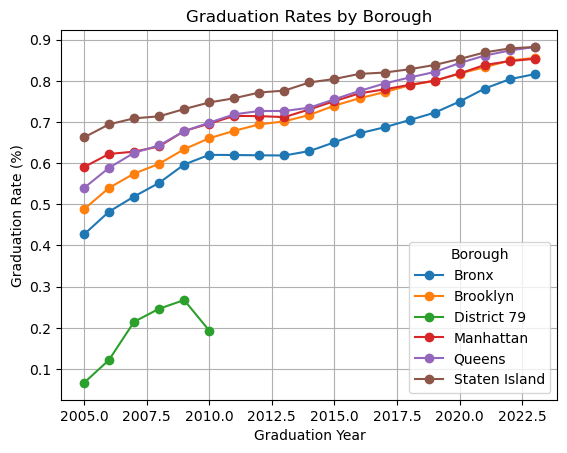

In [52]:
# Pivot the data to have boroughs as columns
pivot_df = full_graduates_ethnicity_total.pivot(index='graduation_year', columns='borough', values='graduation_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Borough')

# Show the plot
plt.legend(title='Borough')
plt.grid(True)
plt.show()

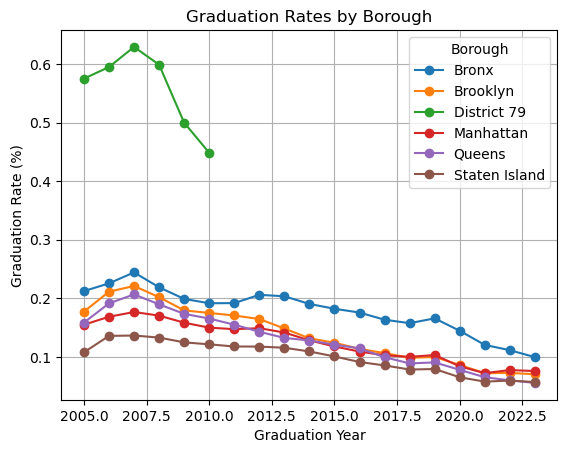

In [53]:
# Pivot the data to have boroughs as columns
pivot_df = full_graduates_ethnicity_total.pivot(index='graduation_year', columns='borough', values='dropout_rate')

# Plot the data
pivot_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rates by Borough')

# Show the plot
plt.legend(title='Borough')
plt.grid(True)
plt.show()

In [54]:
full_graduates_ethnicity_grouped

,graduation_year,borough,category,#_total_cohort,#_grads,#_still_enrolled,#_dropout,graduation_rate,dropout_rate
0,2005,Bronx,Asian,638,479.0,92.0,60.0,0.750784,0.094044
1,2005,Bronx,Black,3852,1662.0,1213.0,770.0,0.431464,0.199896
2,2005,Bronx,Hispanic,6150,2261.0,2035.0,1506.0,0.367642,0.244878
3,2005,Bronx,Multi-Racial,1,0.0,0.0,0.0,0.000000,0.000000
4,2005,Bronx,Native American,56,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
596,2023,Staten Island,Black,1835,1445.0,100.0,222.0,0.787466,0.120981
597,2023,Staten Island,Hispanic,3779,3069.0,212.0,354.0,0.812120,0.093676
598,2023,Staten Island,Multi-Racial,183,160.0,10.0,9.0,0.874317,0.049180
599,2023,Staten Island,Native American,72,62.0,3.0,4.0,0.861111,0.055556


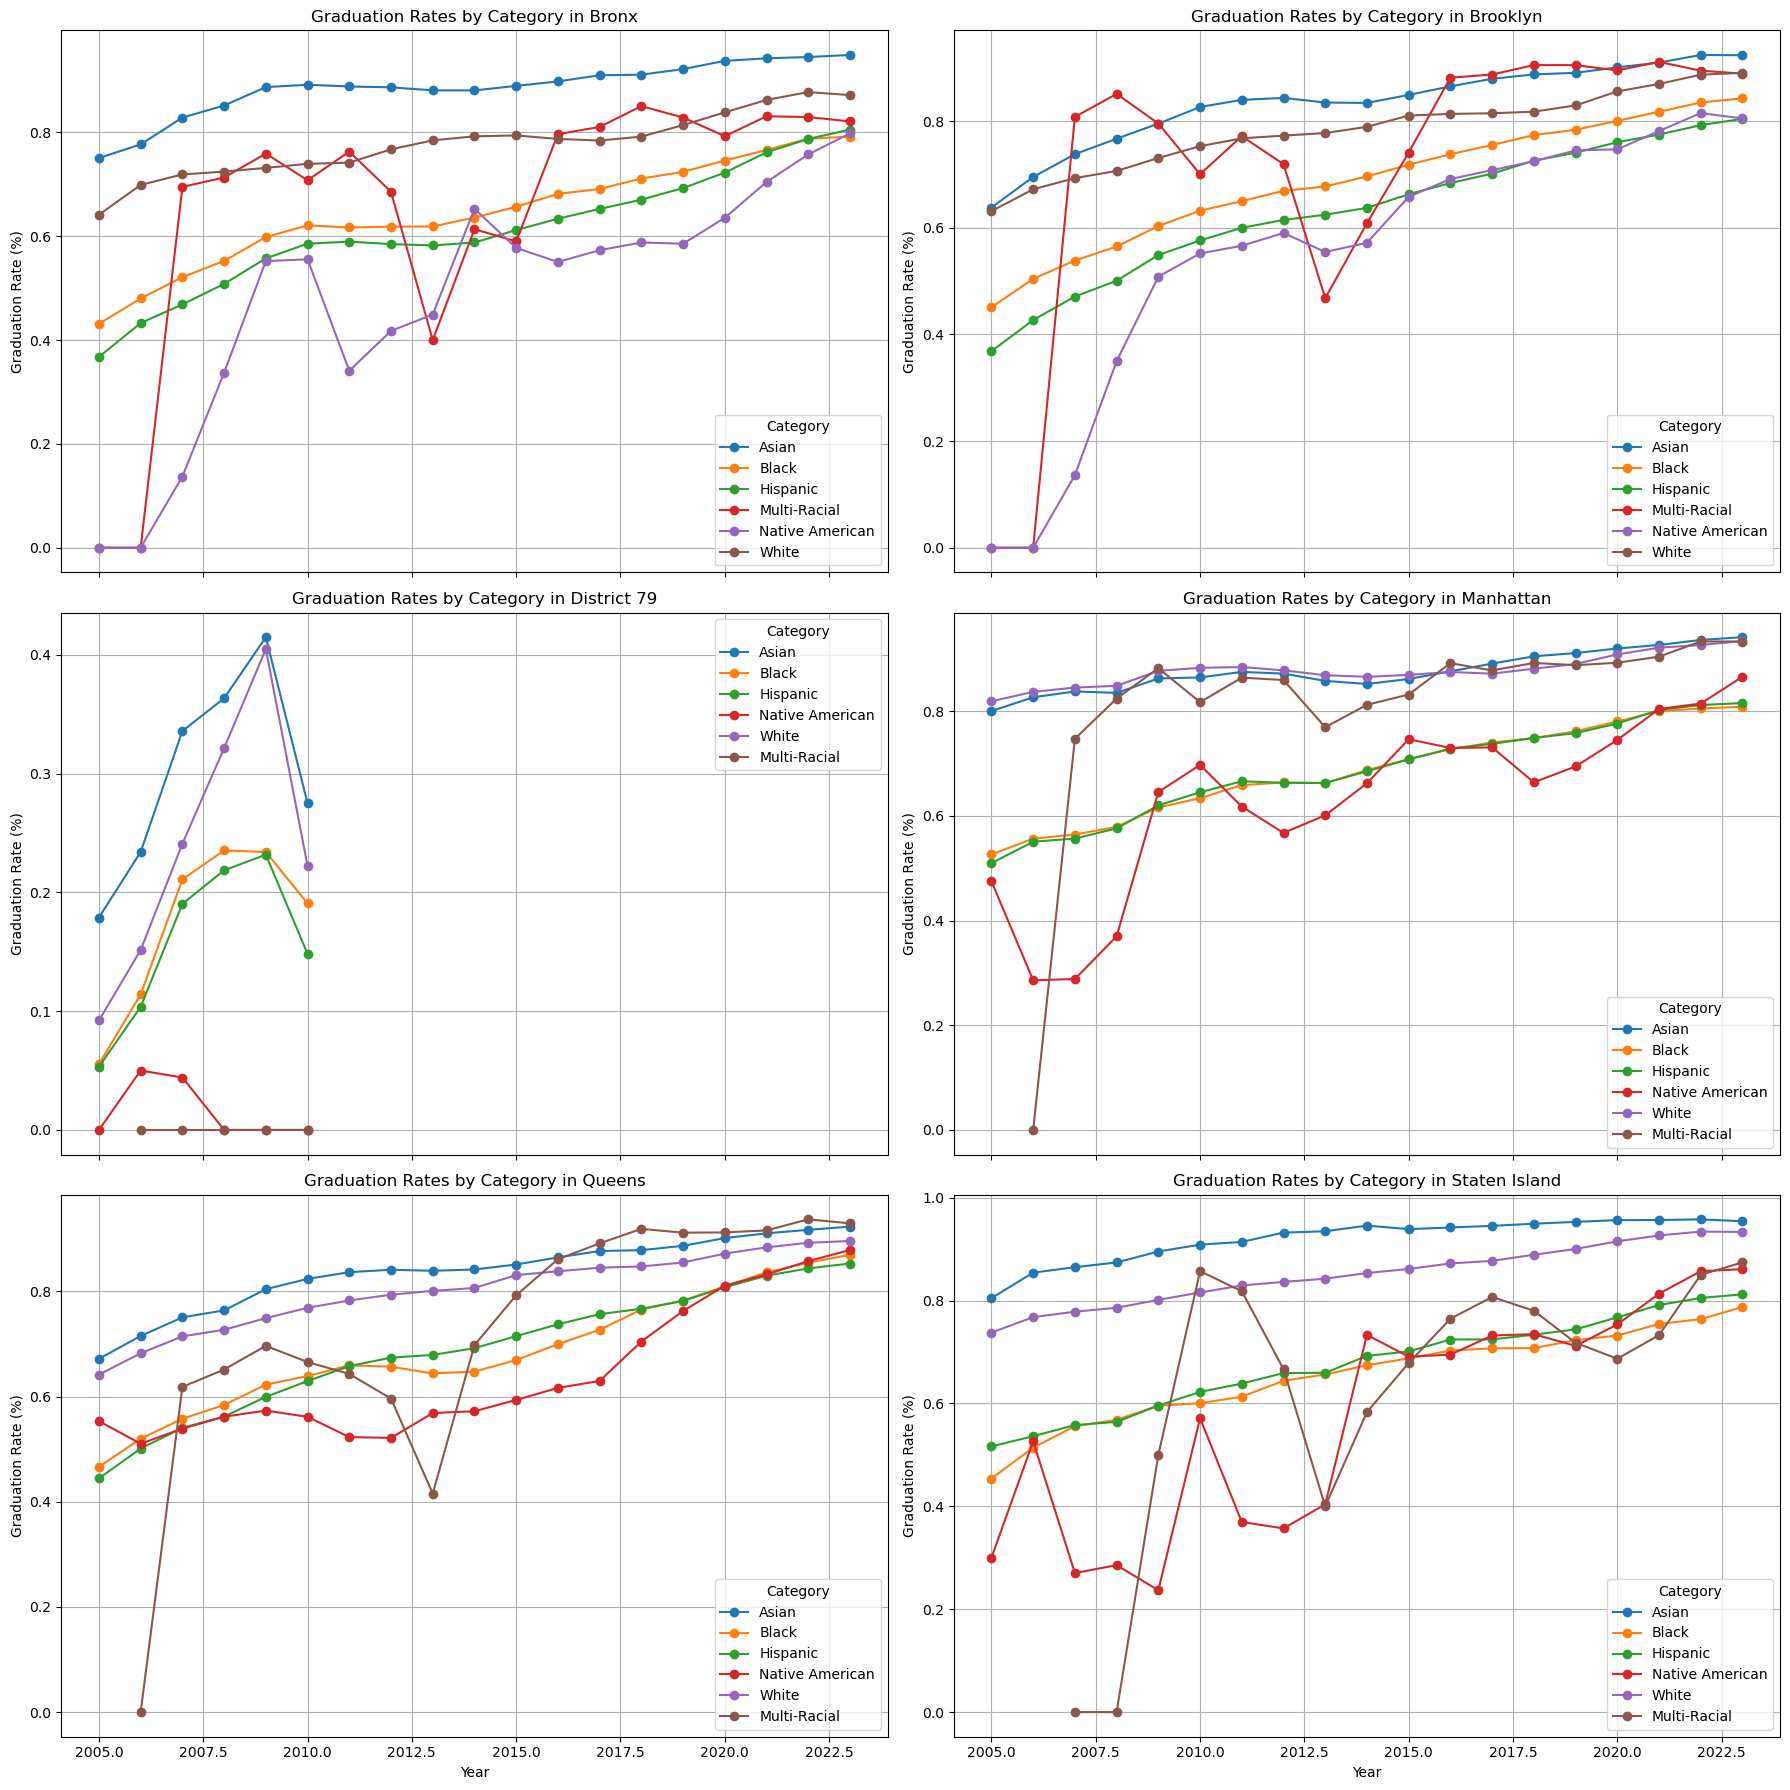

In [55]:

# Get unique boroughs
boroughs = full_graduates_ethnicity_grouped['borough'].unique()

# Calculate number of rows and columns for subplots
n_rows = (len(boroughs) + 1) // 2  # Number of rows
n_cols = 2  # Number of columns

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), sharex=True)

# Plot each borough
for i, borough in enumerate(boroughs):
    row = i // n_cols
    col = i % n_cols
    borough_data = full_graduates_ethnicity_grouped[full_graduates_ethnicity_grouped['borough'] == borough]
    categories = borough_data['category'].unique()
    for category in categories:
        category_data = borough_data[borough_data['category'] == category]
        axs[row, col].plot(category_data['graduation_year'], category_data['graduation_rate'], label=category, marker='o')

    # Add labels and title for each subplot
    axs[row, col].set_title(f'Graduation Rates by Category in {borough}')
    axs[row, col].set_ylabel('Graduation Rate (%)')
    axs[row, col].legend(title='Category')
    axs[row, col].grid(True)

# Add common x-axis label
axs[-1, 0].set_xlabel('Year')
axs[-1, 1].set_xlabel('Year') if len(boroughs) % 2 == 0 else None  # Only set xlabel for the last subplot in the last row if even number of boroughs

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
